In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import torchvision

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


##2.1

In [ ]:
# VGG11 net
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2))
        self.conv2 = nn.Sequential(
            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2))
        self.conv3 = nn.Sequential(
            nn.Conv2d(128, 256, 3, 1, 1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.conv4 = nn.Sequential(
            nn.Conv2d(256, 256, 3, 1, 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2, 2))
        self.conv5 = nn.Sequential(
            nn.Conv2d(256, 512, 3, 1, 1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.conv6 = nn.Sequential(
            nn.Conv2d(512, 512, 3, 1, 1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(2, 2))
        self.conv7 = nn.Sequential(
            nn.Conv2d(512, 512, 3, 1, 1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.conv8 = nn.Sequential(
            nn.Conv2d(512, 512, 3, 1, 1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(2, 2))

        self.fc1 = nn.Sequential(
            nn.Linear(512, 4096),
            nn.Dropout(0.5))
        self.fc2 = nn.Sequential(
            nn.Linear(4096, 4096),
            nn.Dropout(0.5))
        self.fc3 = nn.Linear(4096, 10)

    def forward(self, input):
        c1 = self.conv1(input)

        c2 = self.conv2(c1)

        c3 = self.conv3(c2)

        c4 = self.conv4(c3)

        c5 = self.conv5(c4)

        c6 = self.conv6(c5)

        c7 = self.conv7(c6)

        c8 = self.conv8(c7)

        c8 = torch.flatten(c8, 1)

        f9 = self.fc1(c8)

        f10 = self.fc2(f9)

        output = self.fc3(f10)
        return output

In [ ]:
# set parameters and download data
n_epochs = 5
n_batch_size = 200
n_display_step = 1
n_learning_rate = 0.01

mnist_train_data = torchvision.datasets.MNIST('.',
                                        transform=torchvision.transforms.Compose([
                                            torchvision.transforms.Resize((32,32)),
                                            torchvision.transforms.ToTensor()  # Convert PIL Image to Tensor
                                        ]), download=True)
mnist_test_data = torchvision.datasets.MNIST('.', train=False,
                                        transform=torchvision.transforms.Compose([
                                            torchvision.transforms.Resize((32,32)),
                                            torchvision.transforms.ToTensor()  # Convert PIL Image to Tensor
                                        ]))
train_loader = torch.utils.data.DataLoader(mnist_train_data, shuffle=True, batch_size=n_batch_size)
test_loader = torch.utils.data.DataLoader(mnist_test_data, shuffle=False, batch_size=n_batch_size)

# initialize lists and net, criterion and optimizer
train_loss = []
test_loss = []
train_epoch_loss = []
test_epoch_loss = []
train_acc = []
test_acc = []

net = Net()
print(net)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=n_learning_rate, momentum=0.9)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15792384.78it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 549161.51it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4475412.93it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7285097.04it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

Net(
  (conv1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv4): Sequential(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, 

In [ ]:
print(mnist_test_data[1])

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), 2)


In [ ]:
# function to calculate accuracy from given model and dataloader
# created with help from the tutorial: https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html
def get_accuracy(model, loader, mode):
    global test_loss, test_epoch_loss
    model.eval()
    n_samples = 0
    n_correct = 0

    with torch.no_grad():
        test_loss = []
        for step, (x, target) in enumerate(loader):
            output = model(x)
            _, pred = torch.max(output, 1)
            n_samples += target.size(0)
            # add number of correct preds
            n_correct += (pred == target).sum().item()
            loss = criterion(output, target)
            # record test loss
            test_loss.append(loss.item())
        if mode == 'test':
          test_epoch_loss.append(np.array(test_loss).mean())

    return n_correct / n_samples

# function to train the net
def train(model, criterion, optimizer, epochs, train_loader, test_loader):
    global train_loss, train_epoch_loss, train_acc, test_acc
    for epoch in range(epochs):
        for step, (x, target) in enumerate(train_loader):
            model.train()
            optimizer.zero_grad()
            output = model(x)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())

            if step % n_display_step == 0:
                print("Epoch {:2d} Step {:4d} Loss {:.4f}".format(epoch, step, loss.item()))
        train_epoch_loss.append(np.array(train_loss).mean())
        train_loss = []
        train_acc.append(get_accuracy(model, train_loader, 'train'))
        test_acc.append(get_accuracy(model, test_loader, 'test'))
        print("Epoch {:2d} Loss {:.4f} Accuracy (Train | Test) {:.4f} {:.4f}".format(epoch, loss.item(), train_acc[-1], test_acc[-1]))

train(net, criterion, optimizer, n_epochs, train_loader, test_loader)

Epoch  0 Step    0 Loss 2.3872
Epoch  0 Step    1 Loss 2.2884
Epoch  0 Step    2 Loss 2.0015
Epoch  0 Step    3 Loss 1.7130
Epoch  0 Step    4 Loss 1.5455
Epoch  0 Step    5 Loss 1.3660
Epoch  0 Step    6 Loss 1.0843
Epoch  0 Step    7 Loss 1.0638
Epoch  0 Step    8 Loss 0.7336
Epoch  0 Step    9 Loss 0.5500
Epoch  0 Step   10 Loss 0.4549
Epoch  0 Step   11 Loss 0.3109
Epoch  0 Step   12 Loss 0.2668
Epoch  0 Step   13 Loss 0.3967
Epoch  0 Step   14 Loss 0.2239
Epoch  0 Step   15 Loss 0.1930
Epoch  0 Step   16 Loss 0.1846
Epoch  0 Step   17 Loss 0.2003
Epoch  0 Step   18 Loss 0.1650
Epoch  0 Step   19 Loss 0.2704
Epoch  0 Step   20 Loss 0.2122
Epoch  0 Step   21 Loss 0.1215
Epoch  0 Step   22 Loss 0.1543
Epoch  0 Step   23 Loss 0.1535
Epoch  0 Step   24 Loss 0.1360
Epoch  0 Step   25 Loss 0.2057
Epoch  0 Step   26 Loss 0.1627
Epoch  0 Step   27 Loss 0.1307
Epoch  0 Step   28 Loss 0.0940
Epoch  0 Step   29 Loss 0.1981
Epoch  0 Step   30 Loss 0.1327
Epoch  0 Step   31 Loss 0.1460
Epoch  0

##2.2

In [ ]:
# Recorded values
train_epoch_loss = [0.13258893231550853, 0.03380654678097926, 0.02097206998432133, 0.013311732858370912, 0.00890818873383978]
test_epoch_loss = [0.05328276965854457, 0.03020039773255121, 0.04257094466942363, 0.02315120946635034, 0.023581160298108444]
train_acc = [0.9862833333333333, 0.99305, 0.9888333333333333, 0.9982166666666666, 0.9982666666666666]
test_acc = [0.9844, 0.9902, 0.9868, 0.9938, 0.9926]
print(train_epoch_loss)
print(test_epoch_loss)
print(train_acc)
print(test_acc)

[0.13258893231550853, 0.03380654678097926, 0.02097206998432133, 0.013311732858370912, 0.00890818873383978]
[0.05328276965854457, 0.03020039773255121, 0.04257094466942363, 0.02315120946635034, 0.023581160298108444]
[0.9862833333333333, 0.99305, 0.9888333333333333, 0.9982166666666666, 0.9982666666666666]
[0.9844, 0.9902, 0.9868, 0.9938, 0.9926]


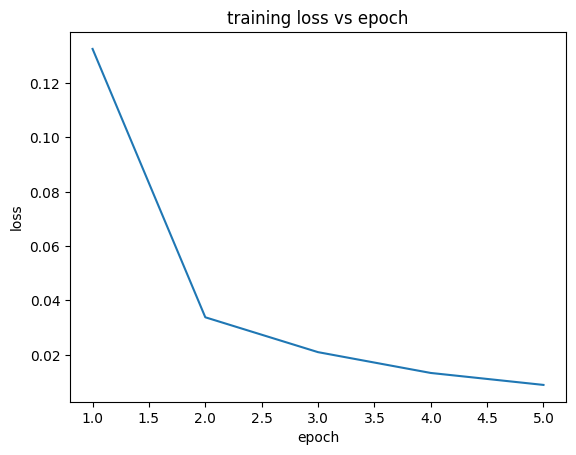

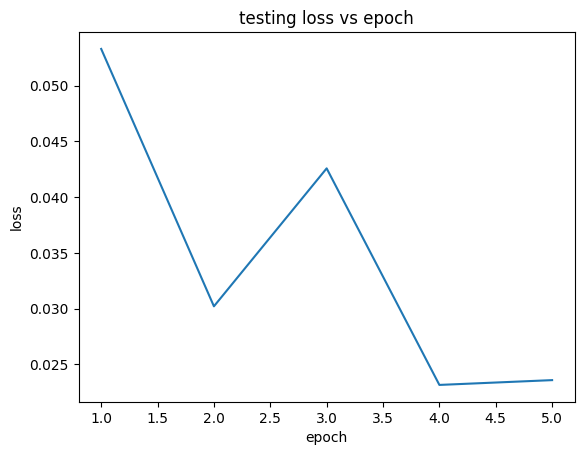

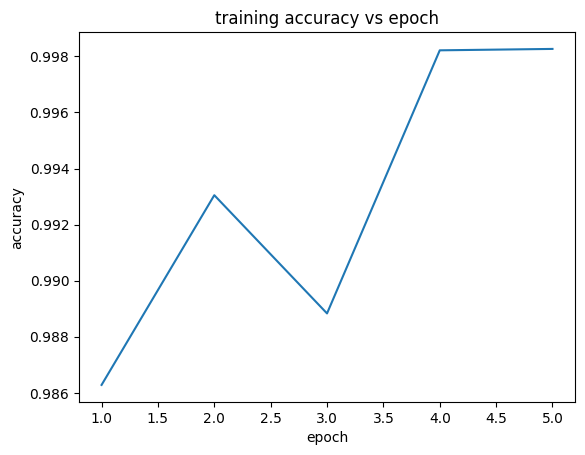

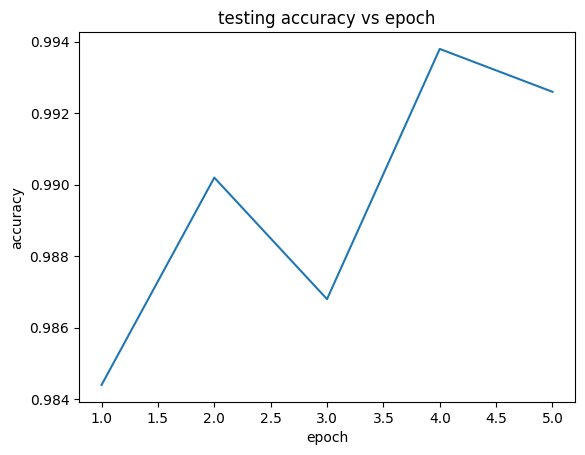

In [ ]:
# plot training and test loss vs epoch
plt.plot(list(range(1,6)),train_epoch_loss, label='train')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('training loss vs epoch')
plt.show()
plt.plot(list(range(1,6)),test_epoch_loss, label='test')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('testing loss vs epoch')
plt.show()

# plot training and test accuracies vs epoch
plt.plot(list(range(1,6)),train_acc, label='train')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('training accuracy vs epoch')
plt.show()
plt.plot(list(range(1,6)),test_acc, label='test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('testing accuracy vs epoch')
plt.show()

##2.3

In [ ]:
# function to calculate accuracy of model with transformation: trans
def get_accuracy_trans(model, loader, trans):
    model.eval()
    n_samples = 0
    n_correct = 0

    with torch.no_grad():
        for step, (x, target) in enumerate(loader):
            output = model(trans(x))
            _, pred = torch.max(output, 1)
            n_samples += target.size(0)
            n_correct += (pred == target).sum().item()
            loss = criterion(output, target)
    return n_correct / n_samples


In [ ]:
# returns function t2 that takes list of tensors and apply gaussian noise with variance: n
def t1(n):
  def t2(x):
    for i,e in enumerate(x):
      x[i] = torchvision.transforms.Lambda(lambda x: x + n*torch.randn_like(x))(e)
    return x
  return t2

In [ ]:
# calculate accuracies with horizontal, vertical flips and 0.01, 0.1, and 1 variance gaussian noise
hor_trans = torchvision.transforms.RandomHorizontalFlip(p=1)
hor_acc = get_accuracy_trans(net, test_loader, hor_trans)

ver_trans = torchvision.transforms.RandomVerticalFlip(p=1)
ver_acc = get_accuracy_trans(net, test_loader, ver_trans)

print("Horizontal flip accuracy: ",hor_acc)
print("Vertical flip accuracy: ",ver_acc)

k = [0.01,0.1,1]
for i in k:
  acc = get_accuracy_trans(net, test_loader, t1(i))
  print(f"Gaussian noise with variance {i} accuracy: ", acc)

Horizontal flip accuracy:  0.3872
Vertical flip accuracy:  0.4293
Gaussian noise with variance 0.01 accuracy:  0.9924
Gaussian noise with variance 0.1 accuracy:  0.9881
Gaussian noise with variance 1 accuracy:  0.1109


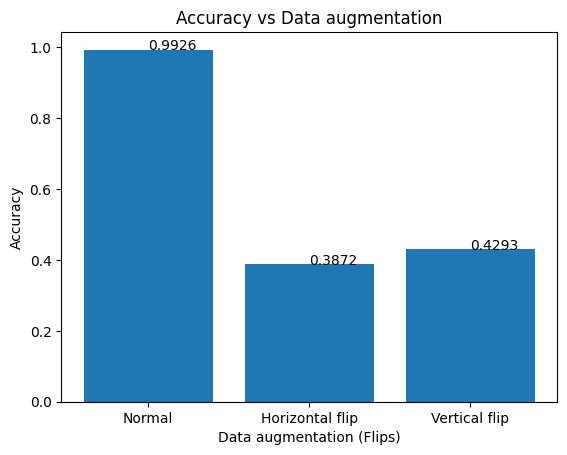

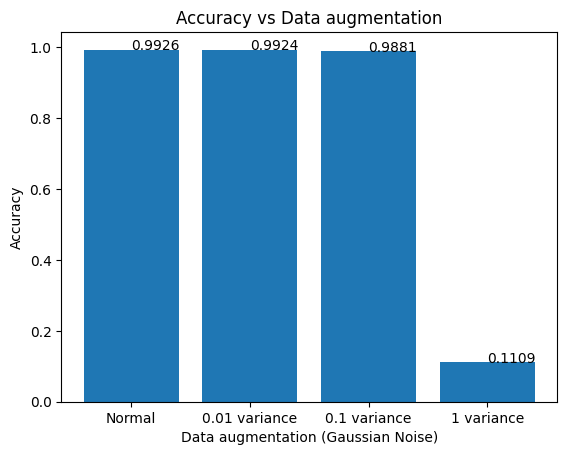

In [ ]:
# plot bar plots of accuracies with data augmentation compared to normal test set accuracy
plt.bar(['Normal', 'Horizontal flip', 'Vertical flip'],[0.9926,0.3872,0.4293])
plt.xlabel('Data augmentation (Flips)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Data augmentation')
for index, value in enumerate([0.9926,0.3872,0.4293]):
    plt.text(index, value, str(value))
plt.show()

plt.bar(['Normal', '0.01 variance', '0.1 variance', '1 variance'],[0.9926,0.9924,0.9881,0.1109])
plt.xlabel('Data augmentation (Gaussian Noise)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Data augmentation')
for index, value in enumerate([0.9926,0.9924,0.9881,0.1109]):
    plt.text(index, value, str(value))
plt.show()

##2.4

In [ ]:
from torchvision.transforms import v2
import random
# train net with data augmentations randomly applied
def train_trans(model, criterion, optimizer, epochs, train_loader, trans):
    global train_loss, train_epoch_loss
    for epoch in range(epochs):
        for step, (x, target) in enumerate(train_loader):
            model.train()
            # randomly choose variance (0 does nothing)
            i = random.choice([0.01,0.1,0,1])
            optimizer.zero_grad()
            output = model(t1(i)(trans(x)))
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

            if step % n_display_step == 0:
                print("Epoch {:2d} Step {:4d} Loss {:.4f}".format(epoch, step, loss.item()))
# random flips
comp_trans = torchvision.transforms.Compose([
    v2.RandomHorizontalFlip(p=0.5),
    v2.RandomVerticalFlip(p=0.5)
])

train_trans(net, criterion, optimizer, 1, train_loader, comp_trans)

Epoch  0 Step    0 Loss 2.4559
Epoch  0 Step    1 Loss 2.4206
Epoch  0 Step    2 Loss 2.3414
Epoch  0 Step    3 Loss 2.2612
Epoch  0 Step    4 Loss 2.0767
Epoch  0 Step    5 Loss 2.4843
Epoch  0 Step    6 Loss 2.1338
Epoch  0 Step    7 Loss 1.6537
Epoch  0 Step    8 Loss 2.3086
Epoch  0 Step    9 Loss 1.5543
Epoch  0 Step   10 Loss 1.8999
Epoch  0 Step   11 Loss 1.5402
Epoch  0 Step   12 Loss 1.2206
Epoch  0 Step   13 Loss 1.0832
Epoch  0 Step   14 Loss 1.8088
Epoch  0 Step   15 Loss 1.2328
Epoch  0 Step   16 Loss 1.1448
Epoch  0 Step   17 Loss 0.9994
Epoch  0 Step   18 Loss 1.4247
Epoch  0 Step   19 Loss 2.1424
Epoch  0 Step   20 Loss 0.8384
Epoch  0 Step   21 Loss 1.7940
Epoch  0 Step   22 Loss 1.0614
Epoch  0 Step   23 Loss 1.0401
Epoch  0 Step   24 Loss 1.0326
Epoch  0 Step   25 Loss 0.9727
Epoch  0 Step   26 Loss 1.0401
Epoch  0 Step   27 Loss 0.8877
Epoch  0 Step   28 Loss 1.0716
Epoch  0 Step   29 Loss 0.7782
Epoch  0 Step   30 Loss 1.5999
Epoch  0 Step   31 Loss 0.9394
Epoch  0

In [ ]:
# calculate accurcies for horizontal and vertical flips and with gaussian noise with variance of 0.01, 0.1, and 1
hor_trans = torchvision.transforms.RandomHorizontalFlip(p=1)
hor_acc = get_accuracy_trans(net, test_loader, hor_trans)
print("Horizontal flip accuracy: ",hor_acc)

ver_trans = torchvision.transforms.RandomVerticalFlip(p=1)
ver_acc = get_accuracy_trans(net, test_loader, ver_trans)
print("Vertical flip accuracy: ",ver_acc)

k = [0.01,0.1,1]
for i in k:
  acc = get_accuracy_trans(net, test_loader, t1(i))
  print(f"Gaussian noise with variance {i} accuracy: ", acc)


Horizontal flip accuracy:  0.8149
Vertical flip accuracy:  0.8573
Gaussian noise with variance 0.01 accuracy:  0.8217
Gaussian noise with variance 0.1 accuracy:  0.8277
Gaussian noise with variance 1 accuracy:  0.3938


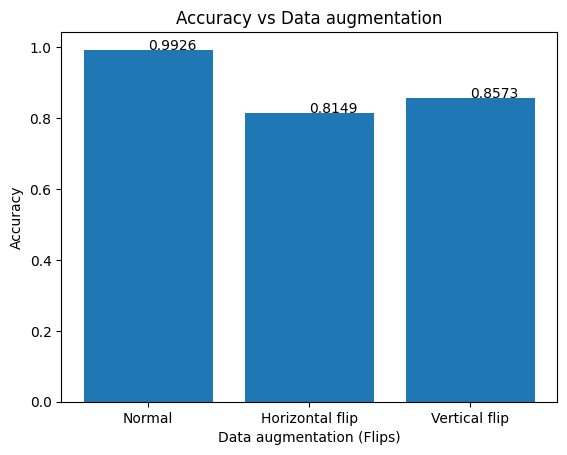

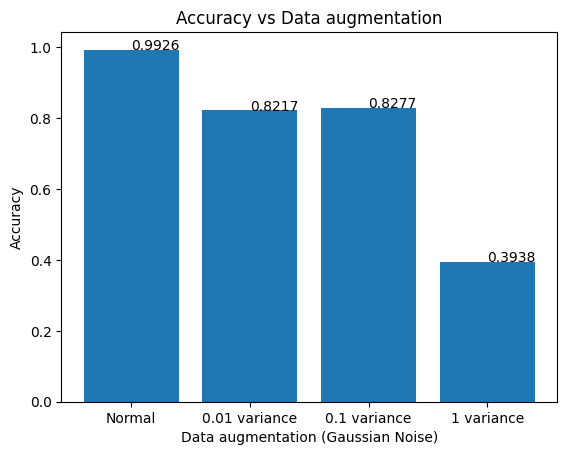

In [ ]:
# plot bar plots of accuracies with data augmentation compared to normal test set accuracy
# Plot accuracies for flips
plt.bar(['Normal', 'Horizontal flip', 'Vertical flip'],[0.9926,0.8149, 0.8573])
plt.xlabel('Data augmentation (Flips)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Data augmentation')
for index, value in enumerate([0.9926,0.8149, 0.8573]):
    plt.text(index, value, str(value))
plt.show()

# Plot accuracies for gaussian noise
plt.bar(['Normal', '0.01 variance', '0.1 variance', '1 variance'],[0.9926, 0.8217,0.8277,0.3938])
plt.xlabel('Data augmentation (Gaussian Noise)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Data augmentation')
for index, value in enumerate([0.9926, 0.8217,0.8277,0.3938]):
    plt.text(index, value, str(value))
plt.show()